# Advent of Code 2015 - Day 9

In [1]:
data = []
with open("inputs_day_9.txt", "r") as f:
  for line in f:
    data.append(line.strip())
print('First 5 data points:', data[:5])
print('Number of data points:', len(data))

First 5 data points: ['Tristram to AlphaCentauri = 34', 'Tristram to Snowdin = 100', 'Tristram to Tambi = 63', 'Tristram to Faerun = 108', 'Tristram to Norrath = 111']
Number of data points: 28


In [2]:
# Parse
distances = []
map = {}
cities = set()
for x in data:
  t = (tuple(x.split(' = ')[0].split(' to ')), int(x.split(' = ')[1]))
  map[tuple(x.split(' = ')[0].split(' to '))] = int(x.split(' = ')[1])
  map[tuple(x.split(' = ')[0].split(' to '))[::-1]] = int(x.split(' = ')[1])

  cities.add(t[0][0])
  cities.add(t[0][1])
  distances.append(t)

distances

[(('Tristram', 'AlphaCentauri'), 34),
 (('Tristram', 'Snowdin'), 100),
 (('Tristram', 'Tambi'), 63),
 (('Tristram', 'Faerun'), 108),
 (('Tristram', 'Norrath'), 111),
 (('Tristram', 'Straylight'), 89),
 (('Tristram', 'Arbre'), 132),
 (('AlphaCentauri', 'Snowdin'), 4),
 (('AlphaCentauri', 'Tambi'), 79),
 (('AlphaCentauri', 'Faerun'), 44),
 (('AlphaCentauri', 'Norrath'), 147),
 (('AlphaCentauri', 'Straylight'), 133),
 (('AlphaCentauri', 'Arbre'), 74),
 (('Snowdin', 'Tambi'), 105),
 (('Snowdin', 'Faerun'), 95),
 (('Snowdin', 'Norrath'), 48),
 (('Snowdin', 'Straylight'), 88),
 (('Snowdin', 'Arbre'), 7),
 (('Tambi', 'Faerun'), 68),
 (('Tambi', 'Norrath'), 134),
 (('Tambi', 'Straylight'), 107),
 (('Tambi', 'Arbre'), 40),
 (('Faerun', 'Norrath'), 11),
 (('Faerun', 'Straylight'), 66),
 (('Faerun', 'Arbre'), 144),
 (('Norrath', 'Straylight'), 115),
 (('Norrath', 'Arbre'), 135),
 (('Straylight', 'Arbre'), 127)]

Let's visualize the cities in a graph.

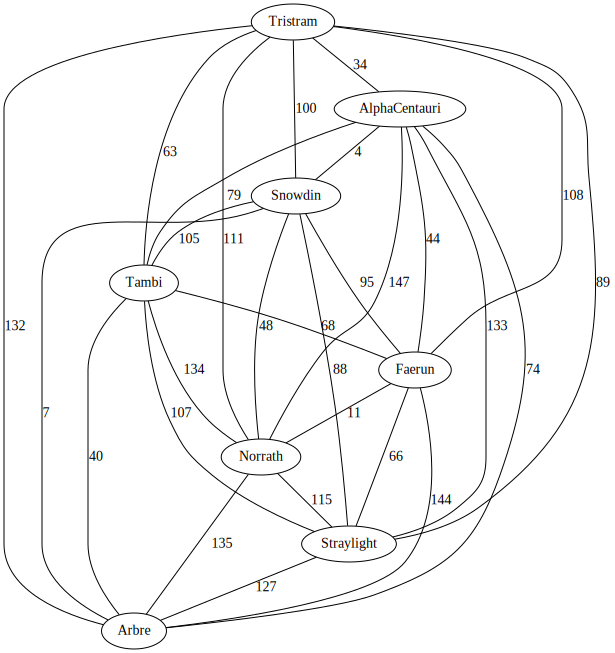

In [3]:
from graphviz import Graph

g = Graph('G', filename='process.gv')

for edge, label in distances:
  g.edge(edge[0], edge[1], label = str(label))

g


This reminds me of the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) (TSP)! This problem, however, is slightly different than the conventional formulation of the TSP, in that we do not have to return back to an initial city i.e., the path is not a cycle and we are not given an initial city. An exact solution might be feasible for a problem of this size. We can enumerate all possible routes and choose the shortest one.

In [13]:
import time
from itertools import permutations

start_time = time.time()

# All possible paths are the permutations of the cities
paths = permutations(cities, len(cities))

path_lengths = []
for path in paths:
  bigrams = [bg for bg in zip(path[:-1], path[1:])] # Grabs pairs of consecutivie cities following a path (a, b), (b, c), (c, d), ....
  length = sum([map[bg] for bg in bigrams]) # Assume map contains an edge value for both (a, b) and (b, a)
  path_lengths.append(length)
  #print(path, length)

print(min(path_lengths))

print("\nExecution completed in {} seconds.".format(time.time() - start_time))

251

Execution completed in 0.10328531265258789 seconds.


That did not take too long, but this method is extremely (asymptotically) inefficient, in that we checked every one of the $40320$ paths. I may come back and explore some [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming) methods.

## Part 2

In [15]:
max(path_lengths)

898